In [8]:
# Import libraries
import pandas as pd
import numpy as np

# Load datasets
train_df = pd.read_csv(r"D:\GUVI AIML\Projects\Insurance Premium Prediction Model\Insurance Premium Dataset\train.csv")
test_df = pd.read_csv(r"D:\GUVI AIML\Projects\Insurance Premium Prediction Model\Insurance Premium Dataset\test.csv")
sample_sub = pd.read_csv(r"D:\GUVI AIML\Projects\Insurance Premium Prediction Model\Insurance Premium Dataset\sample_submission.csv")

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
train_df.head()
train_df.info()
train_df.describe()
train_df.shape


Train shape: (1200000, 21)
Test shape: (800000, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-n

(1200000, 21)

In [15]:
train_df.head(10)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0.0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1.0,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2.0,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3.0,21.0,Male,99583.5,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4.0,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0
5,5.0,29.0,Male,45963.0,Married,1.0,Bachelor's,NaN,33.053198,Urban,...,2.0,4.0,614.0,5.0,2022-05-20 15:21:39.207847,Average,No,Weekly,House,3001.5
6,6.0,41.0,Male,40336.0,Married,0.0,PhD,NaN,NaN,Rural,...,2.0,8.0,807.0,6.0,2020-02-21 15:21:39.219432,Poor,No,Weekly,House,439.0
7,7.0,48.0,Female,99583.5,Divorced,2.0,High School,Employed,5.769783,Suburban,...,1.0,11.0,398.0,5.0,2022-08-08 15:21:39.181605,Average,No,Rarely,Condo,111.0
8,8.0,21.0,Male,1733.0,Divorced,3.0,Bachelor's,NaN,17.869551,Urban,...,1.0,10.0,685.0,8.0,2020-12-14 15:21:39.198406,Average,No,Monthly,Condo,213.0
9,9.0,44.0,Male,52447.0,Married,2.0,Master's,Employed,20.473718,Urban,...,1.0,9.0,635.0,3.0,2020-08-02 15:21:39.144722,Poor,No,Daily,Condo,64.0


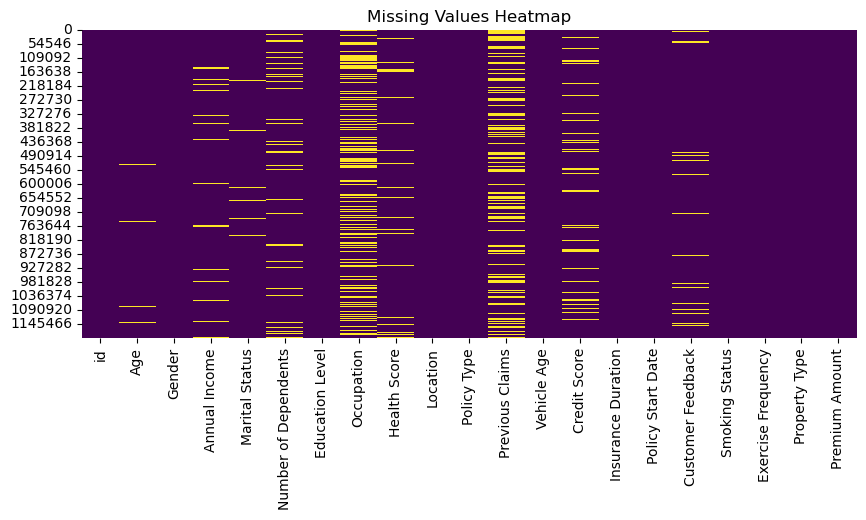

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Missing values
plt.figure(figsize=(10,4))
sns.heatmap(train_df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


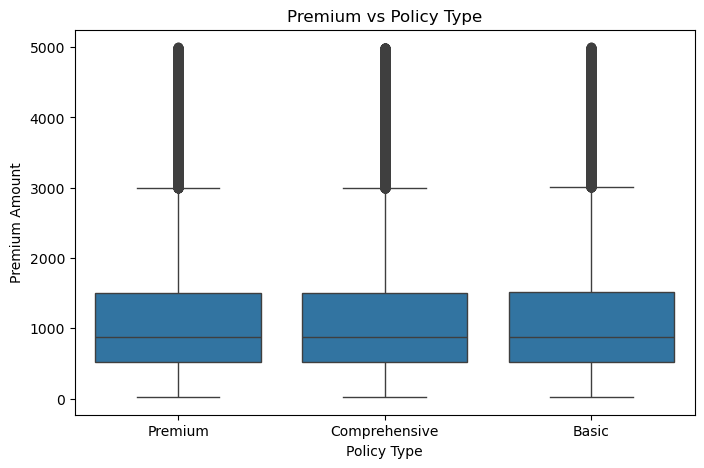

In [10]:
# Before Handling Outliers Policy Type vs Premium
plt.figure(figsize=(8,5))
sns.boxplot(x='Policy Type', y='Premium Amount', data=train_df)
plt.title("Premium vs Policy Type")
plt.show()

In [11]:
def cap_outliers(series):
    Q1=series.quantile(0.25)
    Q3=series.quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    return np.where(series<lower,lower,np.where(series>upper,upper,series))
num_cols=train_df.select_dtypes(include=['int64','float64']).columns
for col in num_cols:
    train_df[col]=cap_outliers(train_df[col])

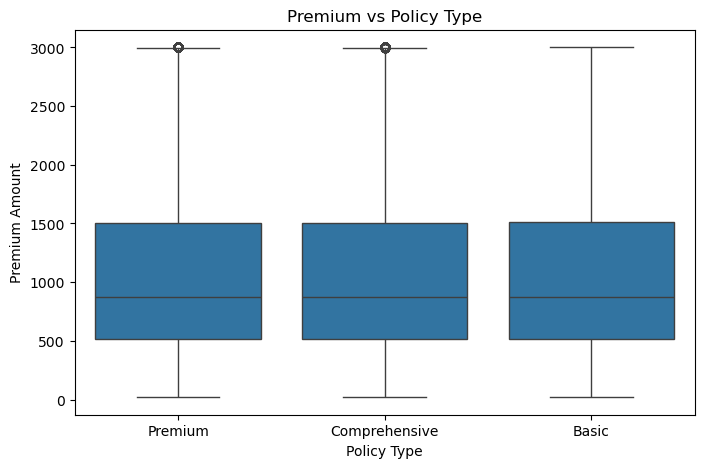

In [12]:
# After Handling Policy Type vs Premium
plt.figure(figsize=(8,5))
sns.boxplot(x='Policy Type', y='Premium Amount', data=train_df)
plt.title("Premium vs Policy Type")
plt.show()

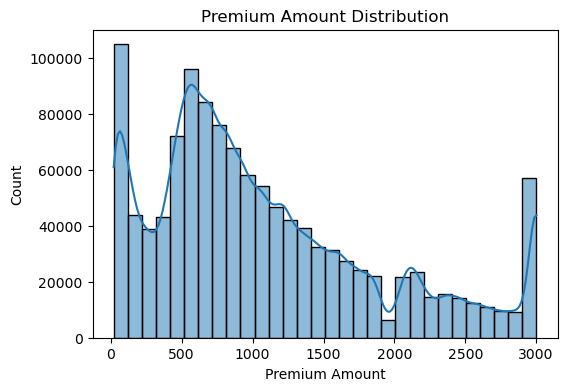

In [13]:

# Distribution of target variable
plt.figure(figsize=(6,4))
sns.histplot(train_df['Premium Amount'], bins=30, kde=True)
plt.title("Premium Amount Distribution")
plt.show()


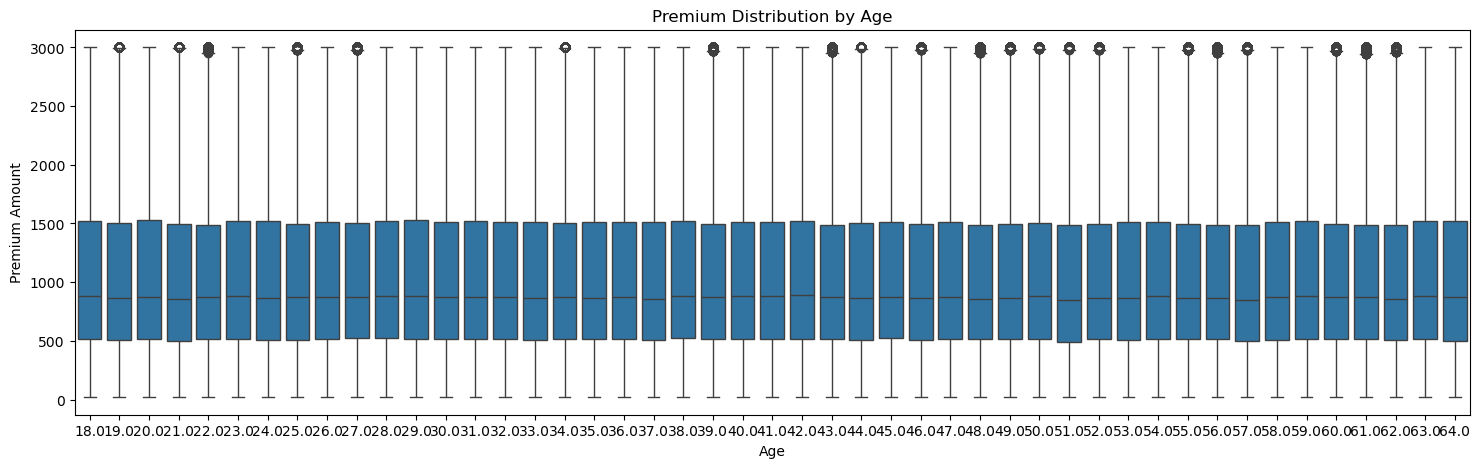

In [19]:
plt.figure(figsize=(18,5))
sns.boxplot(x='Age',y='Premium Amount',data=train_df)
plt.title('Premium Distribution by Age')
plt.show()

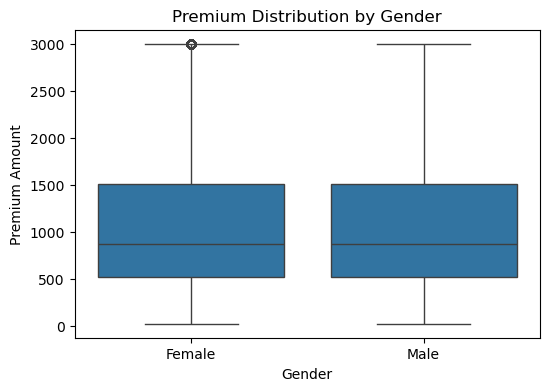

In [22]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Gender", y="Premium Amount", data=train_df)
plt.title("Premium Distribution by Gender")
plt.show()

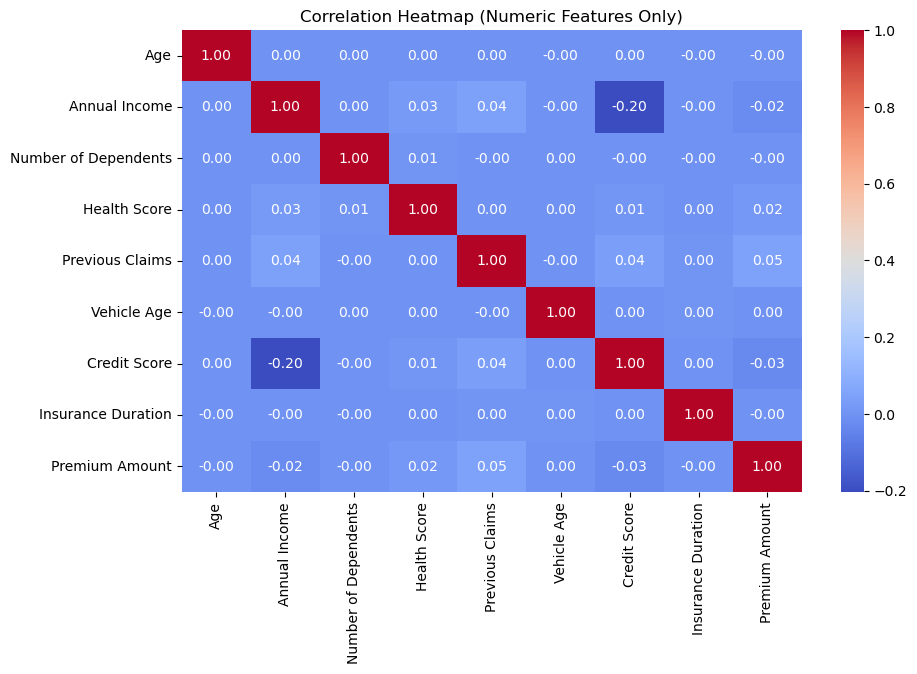

In [29]:
# Correlation heatmap (only numeric features)
plt.figure(figsize=(10,6))
numeric_df = train_df.select_dtypes(include=['int64','float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


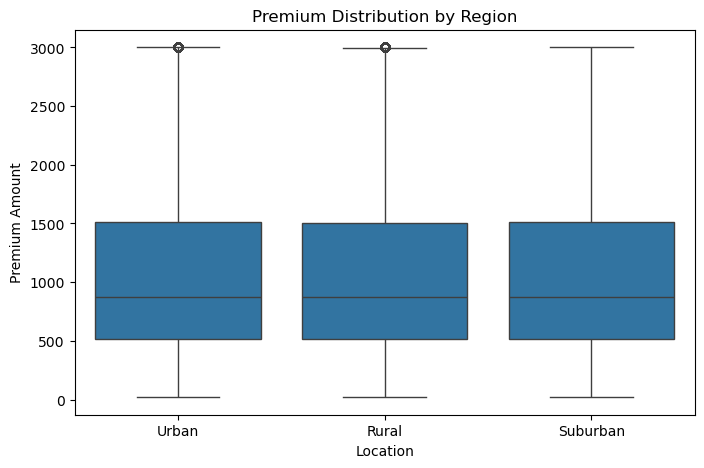

In [27]:
if "Location" in train_df.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(x="Location", y="Premium Amount", data=train_df)
    plt.title("Premium Distribution by Region")
    plt.show()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Drop non-predictive columns
train_df = train_df.drop(['id','Policy Start Date'], axis=1)
test_df = test_df.drop(['id','Policy Start Date'], axis=1)

# Features and target
X = train_df.drop('Premium Amount', axis=1)
y = train_df['Premium Amount']

# Identify column types
num_cols = X.select_dtypes(include=['int64','float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# Pipelines
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ])

# Train-val split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Candidate models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(max_depth=12, random_state=42),
    "Random Forest": RandomForestRegressor(
        n_estimators=100, max_depth=15, max_features="sqrt", n_jobs=-1, random_state=42),
    "XGBoost": xgb.XGBRegressor(
        n_estimators=200, learning_rate=0.05, max_depth=8,
        subsample=0.8, colsample_bytree=0.8, random_state=42, n_jobs=-1)
}


In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

results = {}
for name, model in models.items():
    pipe = Pipeline(steps=[("preprocessor", preprocessor),
                           ("model", model)])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_val)

    rmse = mean_squared_error(y_val, preds) ** 0.5
    mae = mean_absolute_error(y_val, preds)
    r2 = r2_score(y_val, preds)

    results[name] = {"RMSE": rmse, "MAE": mae, "R2": r2}

pd.DataFrame(results).T


,RMSE,MAE,R2
Linear Regression,797.641764,639.572097,0.003431
Decision Tree,787.553970,618.226837,0.028479
Random Forest,787.600040,629.566504,0.028366
XGBoost,780.210440,617.157494,0.046513


In [9]:
import mlflow
import mlflow.sklearn

with mlflow.start_run():
    best_model = RandomForestRegressor(
        n_estimators=100, max_depth=15, max_features="sqrt", n_jobs=-1, random_state=42)
    
    pipe = Pipeline(steps=[("preprocessor", preprocessor),
                           ("model", best_model)])
    
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_val)

    rmse = mean_squared_error(y_val, preds) ** 0.5
    mae = mean_absolute_error(y_val, preds)
    r2 = r2_score(y_val, preds)

    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("mae", mae)
    mlflow.log_metric("r2", r2)

    mlflow.sklearn.log_model(pipe, "premium_predictor")


2025/09/02 07:06:21 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/02 07:06:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [10]:
import joblib

joblib.dump(pipe, "premium_predictor.pkl")


['premium_predictor.pkl']